In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import seaborn as sns
import pynbody 
from sklearn.metrics import confusion_matrix

# Put cataloge (AHF) and simulation (output) in the same folder

# Load the simuation

In [3]:
# s = pynbody.load('data/g8.26e11/snap_2000/output/8.26e11.02000') #this is a SimSnap
s = pynbody.load('/mnt/storage/_data/nihao/nihao_classic/g7.55e11/g7.55e11.01024')
h = s.halos() #this is a cataloghue

pynbody.halo : An error occurred while reading substructure file. Falling back to using the halo info.


In [4]:
print('number of particles in h[1]:', len(h[1]))
print('number of particles in h[-1]:', len(h[len(h)]))

number of particles in h[1]: 1185149
number of particles in h[-1]: 50


In [5]:
s.physical_units()

In [6]:
h1 = h[1]
print('len star', len(h1.s), '\t', 'len gas', len(h1.g), '\t', 'len dark matter', len(h1.d))
print('total number of particles', (len(h1.s) + len(h1.g) + len(h1.d)))

len star 483752 	 len gas 245467 	 len dark matter 455930
total number of particles 1185149


# Plot 
halos must be centered before plotting

### Plot of h1 (main halo)

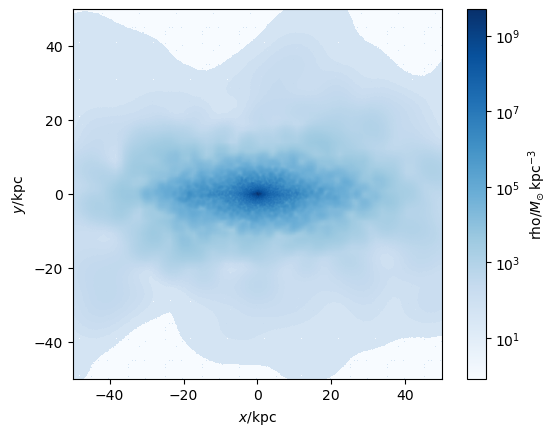

In [7]:
#Edge on
pynbody.analysis.halo.center(h1,mode='hyb')
pynbody.analysis.angmom.sideon(h[1])
pynbody.plot.image(h1.s, width=100, cmap='Blues');

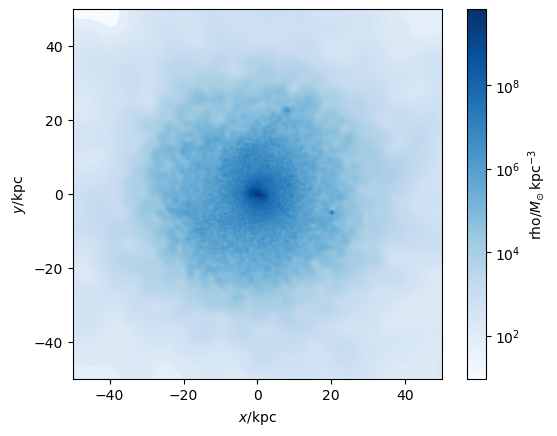

In [8]:
#Face on
pynbody.analysis.angmom.faceon(h[1])
pynbody.plot.image(h[1].s, width=100, cmap='Blues');

### Plot of h[2]

In [ ]:
pynbody.analysis.halo.center(h[2],mode='hyb')
pynbody.plot.image(h[2].s, width=100, cmap='Blues');

### Profile of density and circular velocity

In [ ]:
pynbody.analysis.angmom.faceon(h[1])
ps = pynbody.analysis.profile.Profile(h1.s, min = 0.01, max = 70, type = 'log')
plt.plot(ps['rbins'], ps['density'])
plt.semilogy()
plt.xlabel(r'$R$ [kpc]')
plt.ylabel(r'$\Sigma$ [M$_\odot$/ kpc$^2$]');

In [ ]:
ps = pynbody.analysis.profile.Profile(h1.s, min=0.01, max=70, type='log')
pg = pynbody.analysis.profile.Profile(h1.g, min=0.01, max=70, type='log')
pd = pynbody.analysis.profile.Profile(h1.d, min=0.01, max=70, type='log')
p = pynbody.analysis.profile.Profile(h1, min=0.01, max=70, type='log')

for prof, name in zip([p, pd, pg, ps], ['total', 'dm', 'gas', 'star']):
    plt.plot(prof['rbins'], prof['density'], label=name)
plt.semilogy()
plt.legend()
plt.xlabel(r'$R$ [kpc]')
plt.ylabel(r'$\Sigma$ [M$_\odot$ / kpc$^2$]');

In [ ]:
ps = pynbody.analysis.profile.Profile(h1.s, min=0.01, max=70, type='log')
pg = pynbody.analysis.profile.Profile(h1.g, min=0.01, max=70, type='log')
pdm = pynbody.analysis.profile.Profile(h1.d, min=0.01, max=70, type='log')
p = pynbody.analysis.profile.Profile(h1, min=0.01, max=70, type='log')

for prof, name in zip([p, pdm, pg, ps], ['total', 'dm', 'gas', 'star']):
    plt.plot(prof['rbins'], prof['v_circ'], label=name)
plt.semilogy()
plt.legend()
plt.xlabel(r'$R$ [kpc]')
plt.ylabel(r'$V_{circ}$ [km/s]');

# Distribution of the whole simulation (no distinction between different halos)

In [ ]:
print(s.s.loadable_keys())

In [ ]:
print(s.derivable_keys())

In [ ]:
h[1].properties.keys()

In [ ]:
h[1].properties['numSubStruct']

In [ ]:
print(h[1].properties['children'])

In [ ]:
h1_children_id, number_of_stars = [], []
for i in h[1].properties['children']:
    h1_children_id.append(i)
    number_of_stars.append(len(h[i].s))
h1_children = pd.DataFrame(data=(zip(h1_children_id, number_of_stars)), columns=('h1_children_index', 'number_of_stars'))
h1_children.head()

In [ ]:
host_halo_id = []
for i, h_i in enumerate(h):
    if h_i.properties['hostHalo'] == -1:
        host_halo_id.append(i+1)

print('Number of halos:', len(h))
print('Numeber of host_halo:', len(host_halo_id))

## Fe/H vs O/Fe 
Plot of [Fe/H] and [O/Fe] for different SolarNeighborhood parameters (R and z) filtering 

In [ ]:
# pynbody.analysis.halo.center(h[1],mode='hyb')
pynbody.analysis.angmom.faceon(h[1])

In [ ]:
disk_filt = pynbody.filt.SolarNeighborhood(r1='0.00e+00 kpc', r2='3.00e+00 kpc', height='5.00e+00 kpc', cen=(0, 0, 0))

In [ ]:
# disk_filt = pynbody.filt.LowPass('r', '30.00 kpc')

In [ ]:
len(s[disk_filt])

In [ ]:
feh = s[disk_filt].s['feh']
ofe = s[disk_filt].s['ofe']

print(len(s.s))
print(len(feh))
print(len(ofe))
plt.hist(ofe)

In [ ]:
feh_array = np.array(feh)
ofe_array = np.array(ofe)

#let's take the 99.9 percentile 
percentile_feh = np.percentile(feh_array, 0.01)
percentile_ofe = np.percentile(ofe_array, 0.01)
print(percentile_feh)
print(percentile_ofe)

In [ ]:
df = pd.DataFrame(data=(zip(feh_array[feh_array>percentile_feh], ofe_array[ofe_array>percentile_ofe])),
                  columns= ['Fe/H', 'O/Fe'])

In [ ]:
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(12, 10))
ax = plt.subplot(gs[0,0]) 
plt.hist(df['Fe/H'], bins = 'sqrt', density=True)
plt.xlabel('Fe/H')

ax = plt.subplot(gs[0,1])
plt.hist(df['O/Fe'], density=True)
plt.xlabel('O/Fe')

ax = plt.subplot(gs[1, :])
plt.hist2d(df['Fe/H'], df['O/Fe'], bins=(500, 500), norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.xlabel('Fe/H')
plt.ylabel('O/Fe')
plt.xlim(-0.6, 0.5)
plt.show()

In [ ]:
def plot_abbundance(r1, r2, height, n_percentile, gs_index):
    #filtering using pynbody.filt.SolarNeighborhood
    pynbody.analysis.angmom.faceon(h[1])
    disk_filt = pynbody.filt.SolarNeighborhood(r1=f'{r1} kpc', r2=f'{r2} kpc', height=f'{height} kpc', cen=(0, 0, 0)) 
    feh = s[disk_filt].s['feh']
    ofe = s[disk_filt].s['ofe']
    
    feh_array = np.array(feh)
    ofe_array = np.array(ofe)
    #let's take the 99.9 percentile 
    percentile_feh = np.percentile(feh_array, n_percentile)
    percentile_ofe = np.percentile(ofe_array, n_percentile)
    
    #dataFrame for easy access
    df = pd.DataFrame(data=( zip(feh_array[feh_array>percentile_feh], ofe_array[ofe_array>percentile_ofe]) ), 
                      columns= ['Fe/H', 'O/Fe'])
    #plotting
    ax = plt.subplot(gs[gs_index])
    plt.hist2d(df['Fe/H'], df['O/Fe'], bins=(500, 500), norm=matplotlib.colors.LogNorm())
    plt.xlabel('[Fe/H]')
    plt.ylabel('[O/Fe]')
    plt.xlim(-0.8, 0.6)
    plt.ylim(-0.16, 0.058)
    x_ticks = ax.xaxis.get_major_ticks()
    x_ticks[-1].label1.set_visible(False)
    plt.colorbar(location='top', shrink=0.9)
    plt.text(x = -0.2, y = 0.04, s=rf'{r1} < R < {r2} kpc')
    if gs_index != 0:
        plt.ylabel('')
        plt.tick_params(labelleft=False)
    return ax

In [ ]:
r_interval = [[0.001, 3.0], [3.0, 5.0], [5.0, 7.0], [7.0, 9.0]]
i=0
gs = gridspec.GridSpec(1, len(r_interval), wspace=0)
fig = plt.figure(figsize=(15, 3), tight_layout=True)
for r in r_interval:
    plot_abbundance(r[0], r[1], height=5, n_percentile=0.1, gs_index=i)
    i+=1
plt.show()

In [ ]:
r_interval = [[0, 20]]
i=0
gs = gridspec.GridSpec(1, len(r_interval), wspace=0)
fig = plt.figure(figsize=(9, 3))
for r in r_interval:
    plot_abbundance(r[0], r[1], height=50, n_percentile=0.1, gs_index=i)
    i+=1

plt.xlim(-2, 1)
plt.ylim(-0.1, 0.6)
plt.show()

In [ ]:
cmap = plt.colormaps['magma']
norm = plt.cm.colors.LogNorm(vmin=0.0001, vmax=0.01)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharey=True)

h0 = axs[0].hist2d(x, y, bins=(int(np.sqrt(N)), int(np.sqrt(N))),  density=True, cmap=cmap, norm=norm)
h1 = axs[1].hist2d(z, w, bins=(int(np.sqrt(T)), int(np.sqrt(T))),  density=True, cmap=cmap, norm=norm)

cbar = fig.colorbar(h0[3], ax=axs)

In [ ]:
def plot_abbundance(fig, axs, r1, r2, height, n_percentile, num_figure, index):
        
    #filtering using pynbody.filt.SolarNeighborhood
    pynbody.analysis.halo.center(h1,mode='hyb')
    disk_filt = pynbody.filt.SolarNeighborhood(r1=f'{r1} kpc', r2=f'{r2} kpc', height=f'{height} kpc', cen=(0, 0, 0)) 
    feh = s[disk_filt].s['feh']
    ofe = s[disk_filt].s['ofe']
    
    feh_array = np.array(feh)
    ofe_array = np.array(ofe)
    #let's take the 99.9 percentile 
    percentile_feh = np.percentile(feh_array, n_percentile)
    percentile_ofe = np.percentile(ofe_array, n_percentile)
    
    #dataFrame for easy access
    df = pd.DataFrame(data=( zip(feh_array[feh_array>percentile_feh], ofe_array[ofe_array>percentile_ofe]) ), 
                      columns= ['Fe/H', 'O/Fe'])
    #plotting
    cmap = plt.colormaps['magma']
    norm = plt.cm.colors.LogNorm(vmin=0.0001, vmax=1e5)
    
    h = axs[index].hist2d(df['Fe/H'], df['O/Fe'], bins=(500, 500), norm=norm, cmap=cmap)
    axs[index].set_xlabel('[Fe/H]')
    axs[index].set_ylabel('[O/Fe]')
    
    axs[index].set_xlim(-0.8, 0.6)
    
    if index != 0:
        axs[index].set_ylabel('')
    
    if index == num_figure-1:
        cbar = fig.colorbar(h[3], ax=axs, location='top', orientation='horizontal', pad=0, fraction=0.1)
    
    return axs

In [ ]:
r_interval = [[0.001, 3.0], [3.0, 5.0], [5.0, 7.0], [7.0, 9.0]]
i=0
fig, axs = plt.subplots(nrows=1, ncols=len(r_interval), sharey=True, figsize=(15, 3))
plt.subplots_adjust(wspace=0)
for r in r_interval:
    plot_abbundance(fig, axs, r[0], r[1], height=5, n_percentile=0.1, num_figure=len(r_interval), index=i)
    i+=1
plt.show()